In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
import sklearn as sk
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
df = pd.read_excel('clean reduced features hystersis with thickness.xlsx')
df = df.drop(['Unnamed: 0'],axis=1)
display(df)

,ETL_stack_sequence_C60 | BCP,ETL_stack_sequence_PCBM-60,ETL_stack_sequence_PCBM-60 | BCP,ETL_stack_sequence_SnO2-c,ETL_stack_sequence_SnO2-np,ETL_stack_sequence_TiO2-c,ETL_stack_sequence_TiO2-c | TiO2-mp,HTL_stack_sequence_NiO-c,HTL_stack_sequence_PEDOT:PSS,HTL_stack_sequence_PTAA,...,Cell_architecture_pin,Perovskite_thickness,Perovskite_deposition_thermal_annealing_temperature,Perovskite_deposition_thermal_annealing_time,JV_scan_speed,JV_reverse_scan_PCE,JV_reverse_scan_Voc,JV_reverse_scan_Jsc,JV_reverse_scan_FF,Hystersis_index
0,0,1,0,0,0,0,0,0,1,0,...,1,400,100,10,5,10.39,0.930,19.910,0.560,0.016362
1,0,0,1,0,0,0,0,0,1,0,...,1,400,100,10,5,12.97,0.960,19.480,0.700,-0.016191
2,0,0,1,0,0,0,0,0,1,0,...,1,400,100,10,5,14.19,0.940,20.400,0.740,0.011276
3,0,1,0,0,0,0,0,1,0,0,...,1,293,100,10,10,15.70,1.070,19.300,0.760,0.012739
4,0,0,0,0,1,0,0,0,0,0,...,1,250,130,10,10,16.10,0.105,17.900,0.670,0.136646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1,0,0,0,0,0,0,0,0,1,...,1,400,100,60,1000,15.96,1.018,20.416,0.768,0.003133
414,1,0,0,0,0,0,0,0,0,1,...,1,400,100,60,1000,16.49,1.016,21.067,0.770,0.003639
415,1,0,0,0,0,0,0,0,0,1,...,1,400,100,60,1000,16.82,1.015,20.844,0.795,0.002378
416,1,0,0,0,0,0,0,0,0,1,...,1,400,100,60,1000,16.08,1.012,20.849,0.762,0.004975


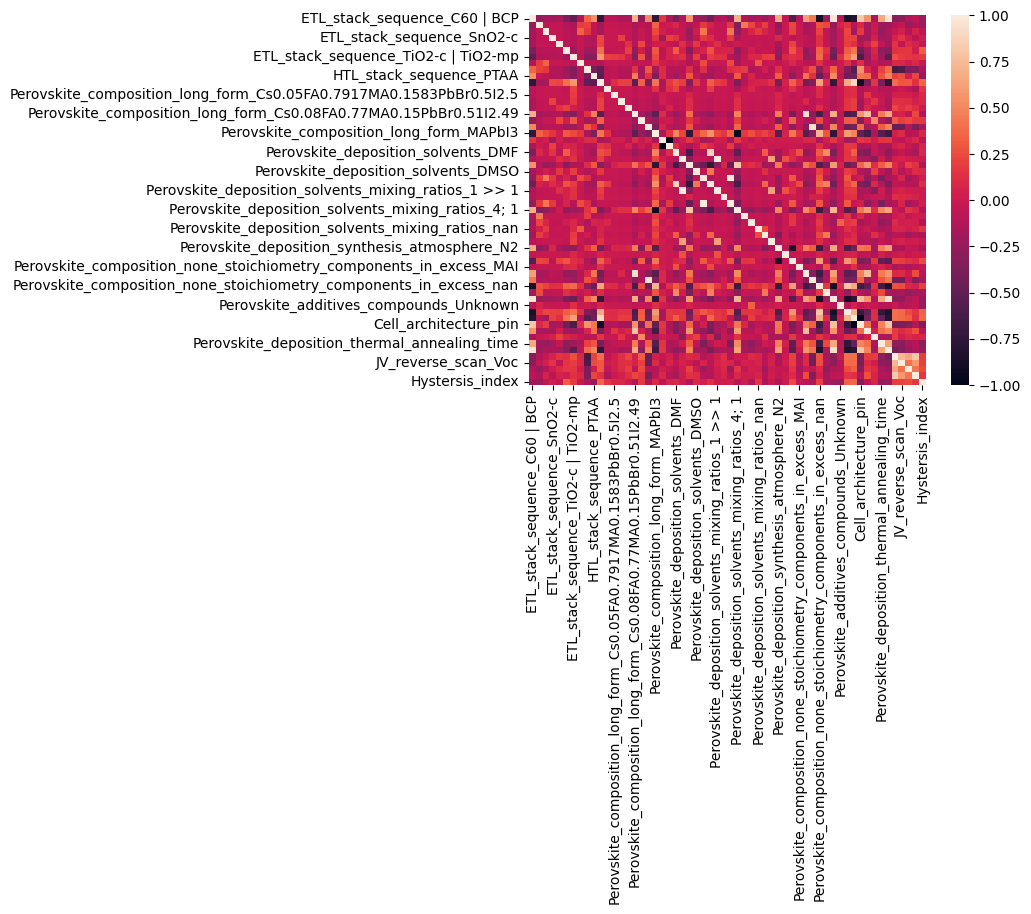

In [3]:
cor = df.corr()['Hystersis_index']
cormatrix = df.corr()
sn.heatmap(cormatrix)
plt.show()
#print(cor)
Cor = pd.DataFrame(cor)
Cor.to_clipboard()
#cormatrix.to_clipboard()

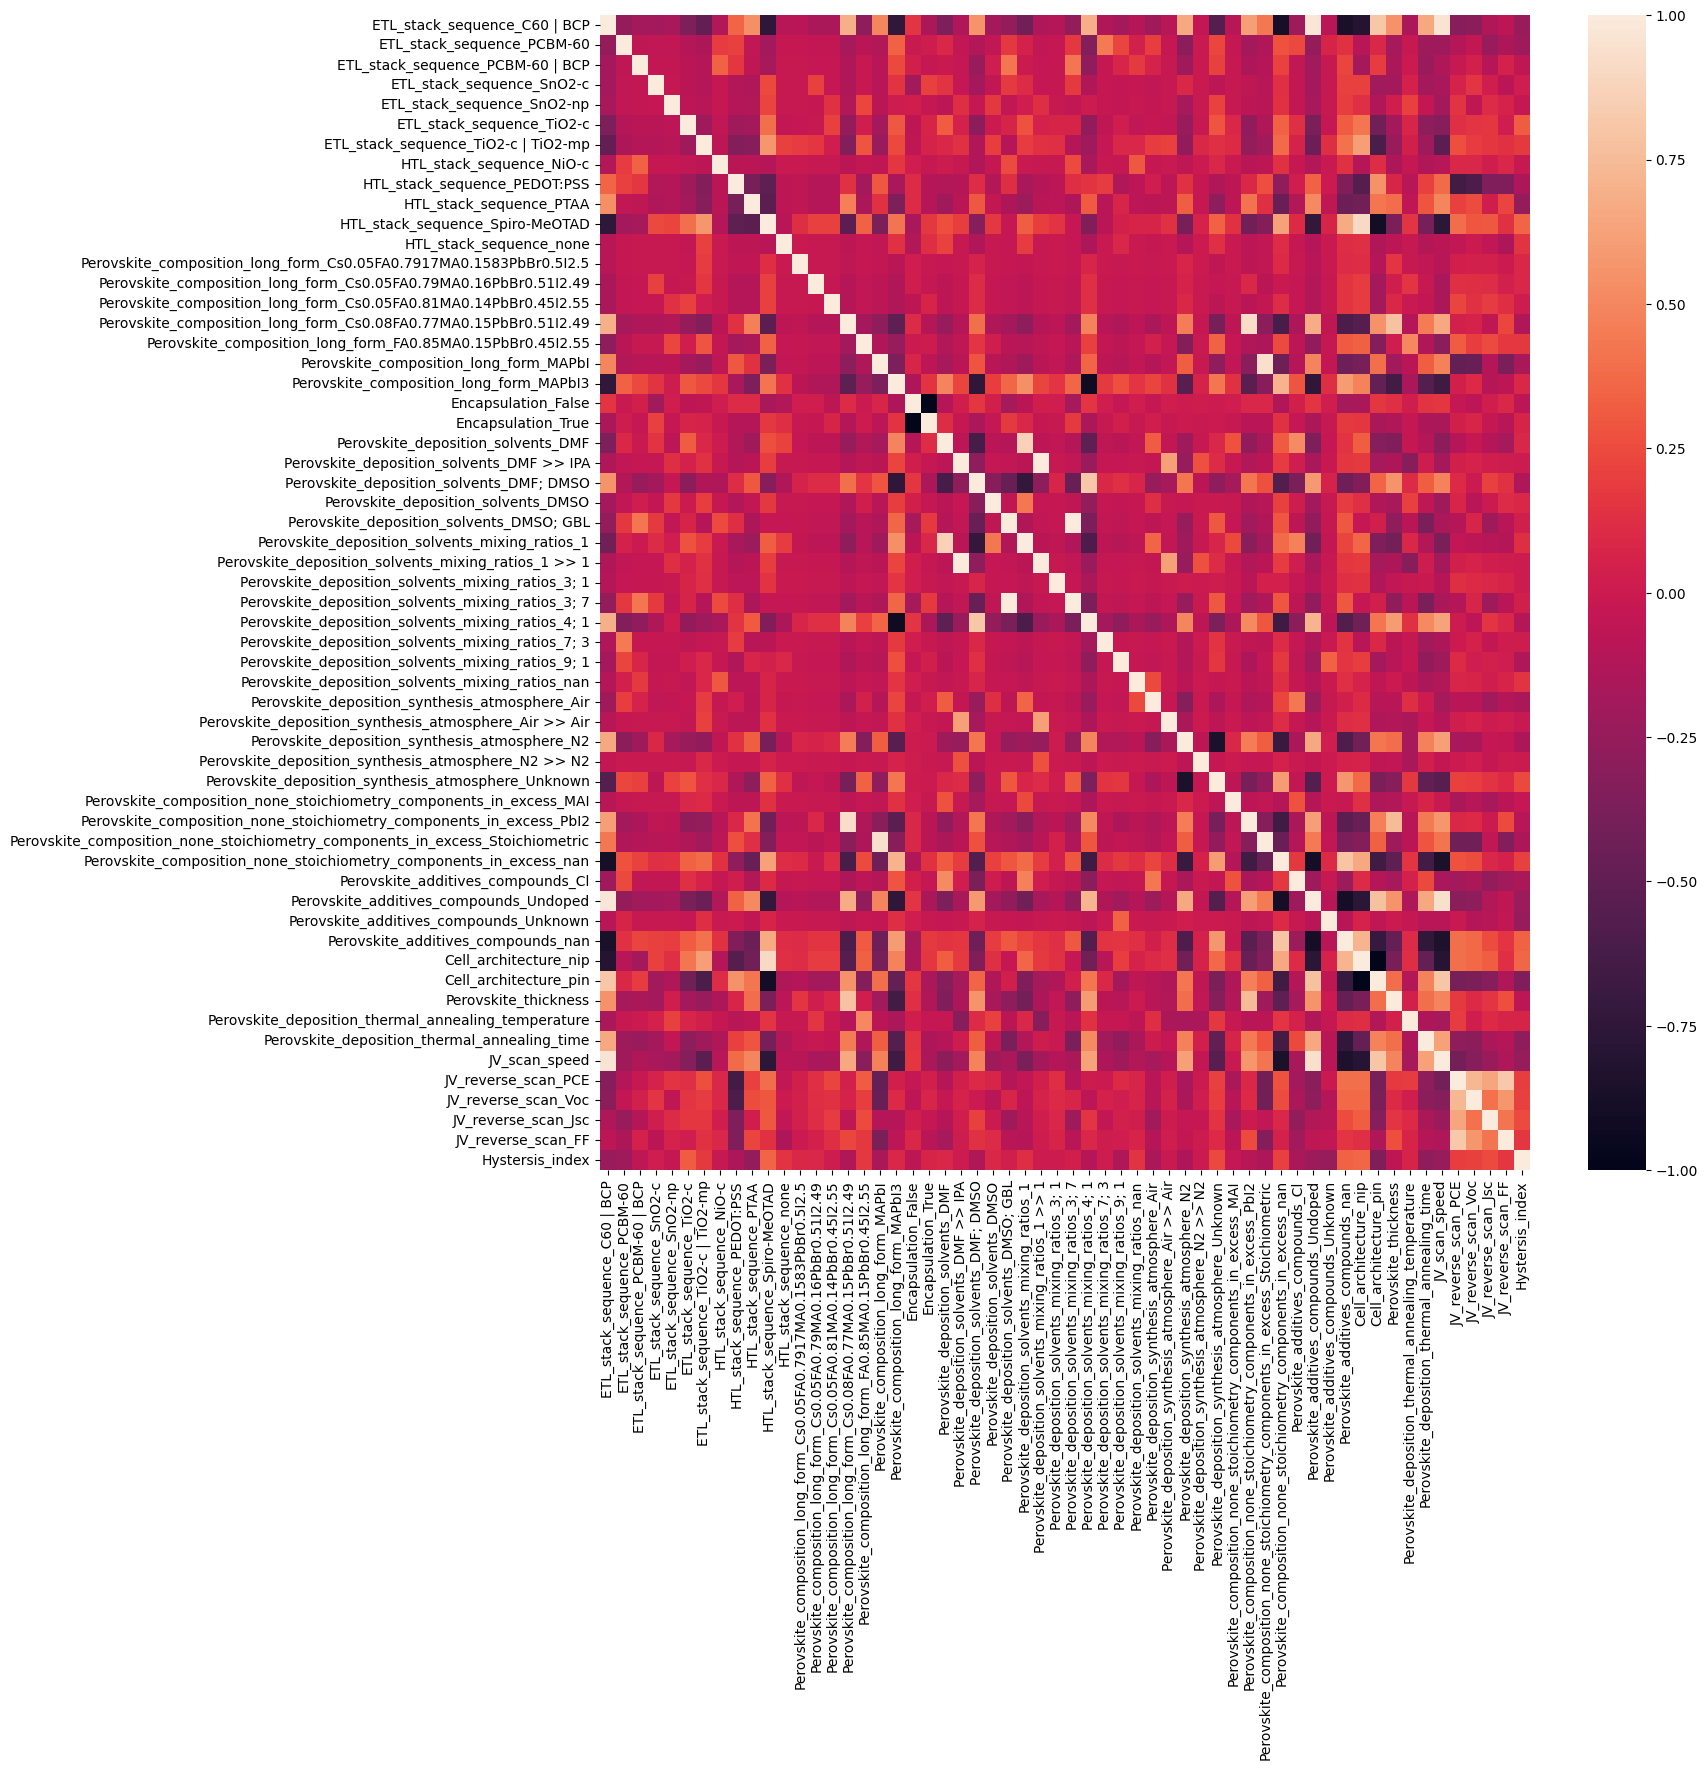

In [4]:
fig, ax = plt.subplots(figsize=(15,15))
sn.heatmap(cormatrix)
plt.show()

In [5]:
X,y = df.drop('Hystersis_index', axis=1), df['Hystersis_index']

from sklearn.model_selection import train_test_split
# Split the data into training and temporary sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the temporary set into validation and test sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

In [6]:
#Optimisation of RF model through Gird Search
"""from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# Define the parameter grid
param_grid = {
    'n_estimators': [60,70,80,90,100],  # Number of trees in the forest
    'max_depth': [None, 40, 60, 80, 90],  # Maximum depth of the tree
    'min_samples_split': [2,3,4],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [2, 3],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Method of selecting samples for training each tree
}
# Create a base model
rfm = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rfm, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_temp, y_temp)

# Get the best parameters
best_params = grid_search.best_params_
print(best_params)"""

"from sklearn.model_selection import GridSearchCV\nfrom sklearn.ensemble import RandomForestRegressor\n# Define the parameter grid\nparam_grid = {\n    'n_estimators': [60,70,80,90,100],  # Number of trees in the forest\n    'max_depth': [None, 40, 60, 80, 90],  # Maximum depth of the tree\n    'min_samples_split': [2,3,4],  # Minimum number of samples required to split an internal node\n    'min_samples_leaf': [2, 3],  # Minimum number of samples required to be at a leaf node\n    'bootstrap': [True, False]  # Method of selecting samples for training each tree\n}\n# Create a base model\nrfm = RandomForestRegressor()\n\n# Instantiate the grid search model\ngrid_search = GridSearchCV(estimator=rfm, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)\n\n# Fit the grid search to the data\ngrid_search.fit(X_temp, y_temp)\n\n# Get the best parameters\nbest_params = grid_search.best_params_\nprint(best_params)"

In [7]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(bootstrap = True, max_depth = 60, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 70)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=60, min_samples_leaf=2, min_samples_split=3,
                      n_estimators=70)

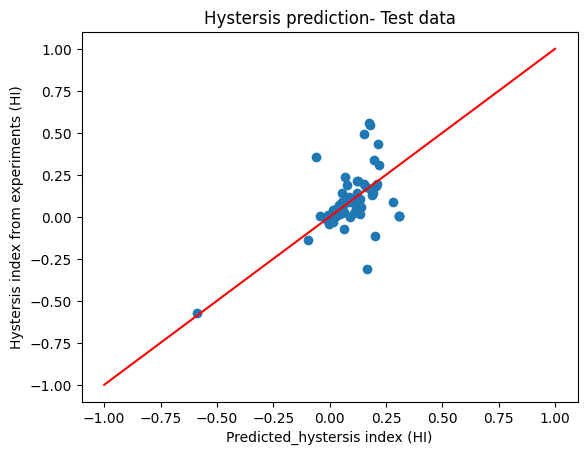

In [16]:
y_pred = rf.predict(X_test)
plt.scatter(y_pred,y_test)
lim1,lim2 = -1,1
xlim,ylim = [lim1,lim2], [lim1,lim2]
#plt.xlim(lim1,lim2)
#plt.ylim(lim1,lim2)
plt.plot(xlim,ylim, color = 'r')
plt.title('Hystersis prediction- Test data')
plt.xlabel('Predicted_hystersis index (HI)')
plt.ylabel('Hystersis index from experiments (HI)')
plt.show()
#print(sqrt(mean_squared_error(y_pred,y_test)))

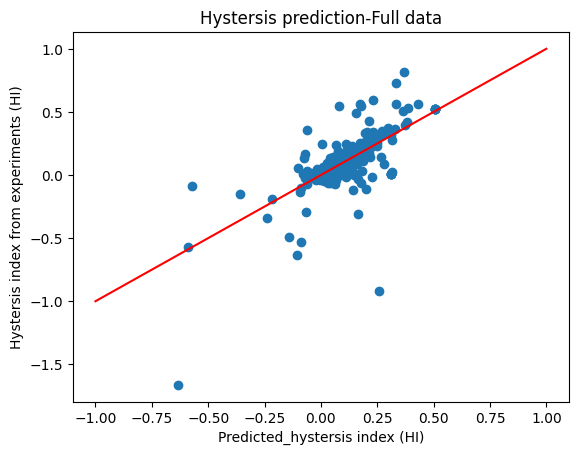

In [15]:
y_fullpred = rf.predict(X)
plt.scatter(y_fullpred,y)
lim1,lim2 = -1,1
xlim,ylim = [lim1,lim2], [lim1,lim2]
#plt.xlim(lim1,lim2)
#plt.ylim(lim1,lim2)
plt.plot(xlim,ylim, color = 'r')
plt.title('Hystersis prediction-Full data')
plt.xlabel('Predicted_hystersis index (HI)')
plt.ylabel('Hystersis index from experiments (HI)')
plt.show()
#print(sqrt(mean_squared_error(y_fullpred,y)))

Plotting HI vs various parameters

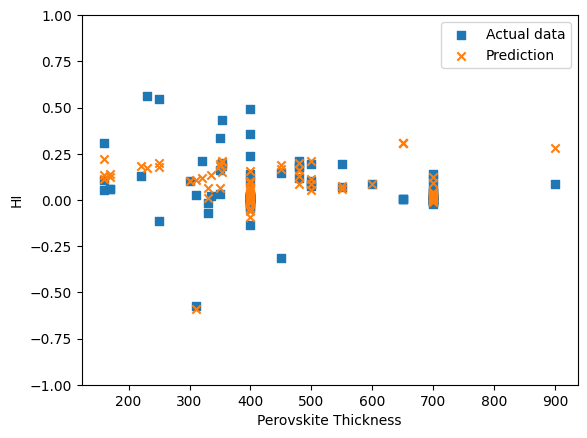

In [34]:
plt.scatter(X_test['Perovskite_thickness'],y_test, label = 'Actual data', marker='s')
plt.scatter(X_test['Perovskite_thickness'],y_pred, label = 'Prediction', marker='x')
plt.xlabel('Perovskite Thickness')
plt.ylabel('HI')
plt.ylim(-1,1)
plt.legend()
plt.show()

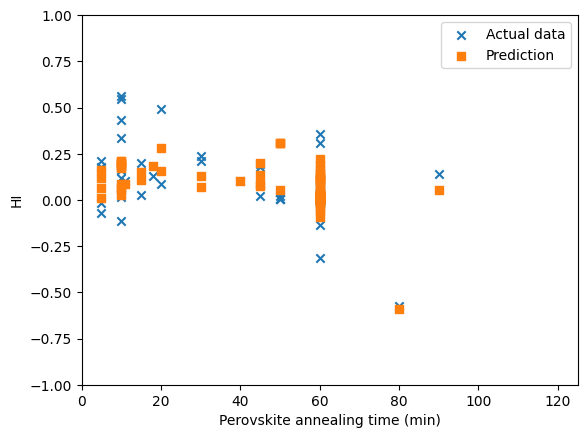

In [35]:
plt.scatter(X_test['Perovskite_deposition_thermal_annealing_time'],y_test, label = 'Actual data', marker='x')
plt.scatter(X_test['Perovskite_deposition_thermal_annealing_time'],y_pred,label = 'Prediction', marker='s')
plt.ylim(-1,1)
plt.xlim(0,125)
plt.legend()
plt.xlabel('Perovskite annealing time (min)')
plt.ylabel('HI')
plt.show()

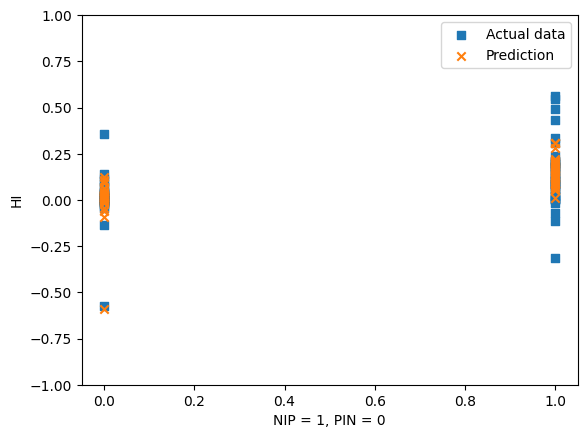

In [48]:
plt.scatter(X_test['Cell_architecture_nip'],y_test, label = 'Actual data', marker= 's')
plt.scatter(X_test['Cell_architecture_nip'],y_pred, label = 'Prediction', marker='x')
plt.ylim(-1,1)
plt.legend()
plt.xlabel('NIP = 1, PIN = 0')
plt.ylabel('HI')
plt.show()

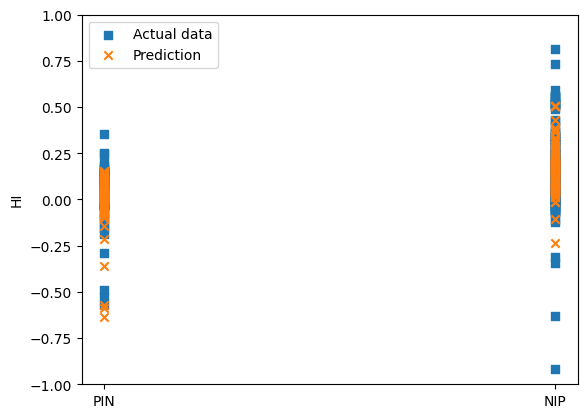

In [49]:

# Assuming 'labels' contains the labels for 0 and 1
labels = ['PIN', 'NIP']

# Your existing code for scatter plot
plt.scatter(X['Cell_architecture_nip'], y, label='Actual data', marker='s')
plt.scatter(X['Cell_architecture_nip'], y_fullpred, label='Prediction', marker='x')

# Set y-axis limits
plt.ylim(-1, 1)

# Set x-axis tick labels
plt.xticks([0, 1], labels)

# Add labels, legend, and show plot
plt.legend()
plt.ylabel('HI')
plt.show()


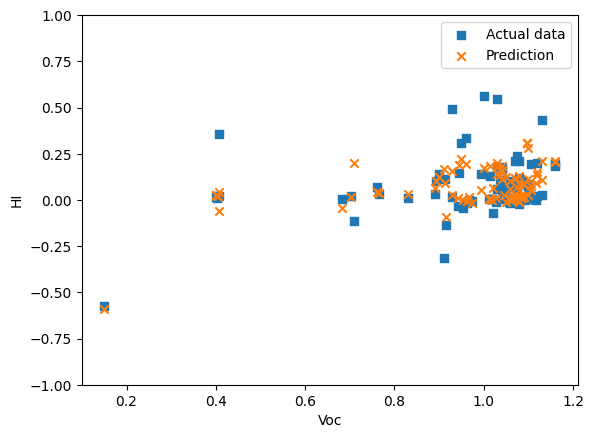

In [36]:
plt.scatter(X_test['JV_reverse_scan_Voc'],y_test, label = 'Actual data', marker= 's')
plt.scatter(X_test['JV_reverse_scan_Voc'],y_pred, label = 'Prediction', marker='x')
plt.ylim(-1,1)
plt.xlabel('Voc')
plt.ylabel('HI')
plt.legend()
plt.show()

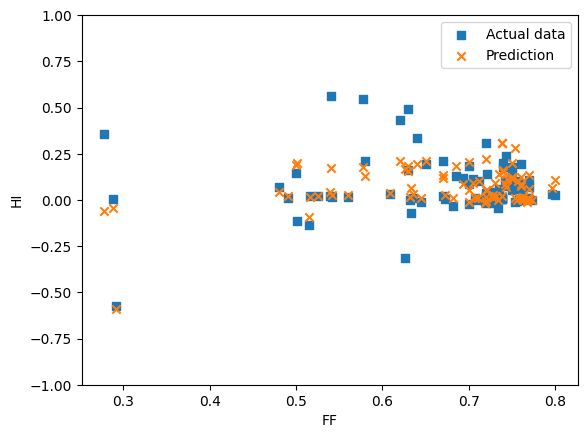

In [37]:
plt.scatter(X_test['JV_reverse_scan_FF'],y_test, label ='Actual data', marker='s')
plt.scatter(X_test['JV_reverse_scan_FF'], y_pred, label='Prediction', marker='x')
plt.ylim(-1,1)
plt.xlabel('FF')
plt.ylabel('HI')
plt.legend()
plt.show()

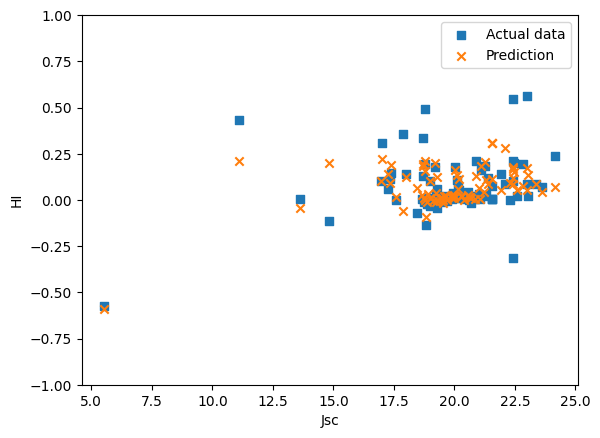

In [38]:
plt.scatter(X_test['JV_reverse_scan_Jsc'],y_test, label ='Actual data', marker='s')
plt.scatter(X_test['JV_reverse_scan_Jsc'], y_pred, label='Prediction', marker='x')
plt.ylim(-1,1)
plt.xlabel('Jsc')
plt.ylabel('HI')
plt.legend()
plt.show()